In [27]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
import cv2

In [28]:
df = pd.read_csv("C:/Users/rlarh/Desktop/tops-pattern/data/annotations/pattern_dataset_filtered.csv")
df['filepath'] = df['filepath'].str.replace("\\", "/")

In [29]:
model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    pooling='avg',
    weights='imagenet'
)

In [30]:
IMG_SIZE = (224, 224)

def load_and_preprocess(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, IMG_SIZE)
    img = img.astype("float32")
    img = tf.keras.applications.efficientnet.preprocess_input(img)
    return img

In [31]:
features = []
labels = []

for _, row in tqdm(df.iterrows(), total=len(df)):
    img = load_and_preprocess(row["filepath"])
    img = np.expand_dims(img, axis=0)
    feat = model.predict(img, verbose=0)[0]

    features.append(feat)
    labels.append(row["label_name"])

100%|██████████| 2835/2835 [02:45<00:00, 17.14it/s]


In [32]:
features = np.array(features)
labels = np.array(labels)

os.makedirs("C:/Users/rlarh/Desktop/tops-pattern/data/features", exist_ok=True)

np.save("C:/Users/rlarh/Desktop/tops-pattern/data/features/features.npy", features)
np.save("C:/Users/rlarh/Desktop/tops-pattern/data/features/labels.npy", labels)

print("저장 완료! feature shape:", features.shape)

저장 완료! feature shape: (2835, 1280)


(np.float64(-0.5), np.float64(141.5), np.float64(391.5), np.float64(-0.5))

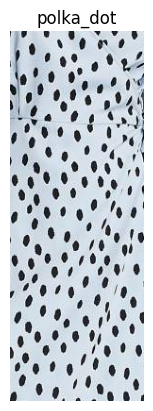

In [33]:
import matplotlib.pyplot as plt
import cv2

sample = df.iloc[0]
img = cv2.imread(sample["filepath"])
x, y, w, h = sample["bbox_x"], sample["bbox_y"], sample["bbox_width"], sample["bbox_height"]
crop = img[y:y+h, x:x+w]
crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)

plt.imshow(crop)
plt.title(sample["label_name"])
plt.axis("off")